<IPython.core.display.Javascript object>


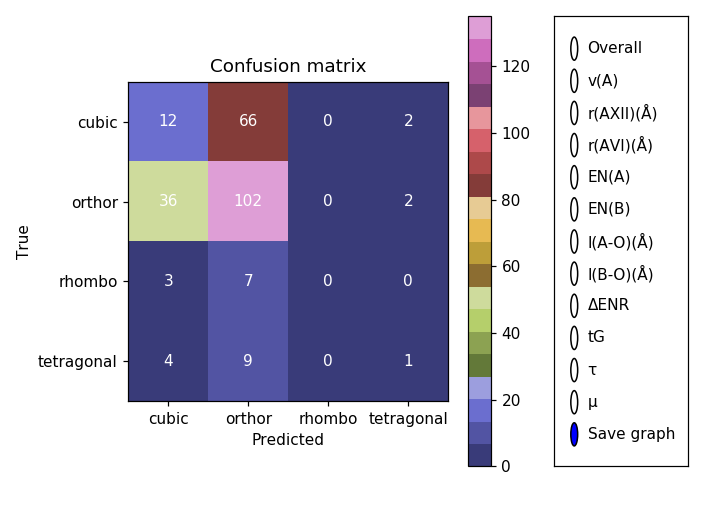

In [1]:
#nbagg allows use of interactive plots within jupyter notebook
%matplotlib nbagg

#imports
from matplotlib.widgets import RadioButtons
import matplotlib.animation
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.animation import FuncAnimation
from matplotlib.artist import Artist


#axes labels list for crystal structure
titles = ['cubic','orthor', 'rhombo', 'tetragonal']

# dic where each key will be the label of the button aka the heading for that variable colum
confusion_matrix_knn = {}
confusion_matrix_svc = {}
confusion_matrix_rfc = {}

#accesses json files into python
knn_file = open("KNN_matrix.json", 'r')
svc_file = open("SVC_matrix.json", 'r')
rfc_file = open("RFC_matrix.json","r") 

#Reads the JSON data into Python 
json_data_knn = json.load(knn_file)
json_data_svc = json.load(svc_file)
json_data_rfc = json.load(rfc_file)
 
# Iterate through the dictionary
# Andsaves the key (the labels) : value (the corresponsing confusion matrix) pairs
for key, value in json_data_knn.items():
    confusion_matrix_knn[key] = np.array(value)

for key, value in json_data_svc.items():
    confusion_matrix_svc[key] = np.array(value)
    
for key, value in json_data_rfc.items():
    confusion_matrix_rfc[key] = np.array(value)
    
#Closes the opened JSON files
knn_file.close()
svc_file.close()
rfc_file.close()

# initialises the subplot with two plots side by side
fig, (ax0, axs) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

# labels the axes with crystal structure 
ax0.set_xticks(np.arange(len(titles)))
ax0.set_yticks(np.arange(len(titles)))
ax0.set_xticklabels(labels=titles)
ax0.set_yticklabels(labels=titles)
ax0.set_title("Confusion matrix") 
ax0.set_xlabel("Predicted")
ax0.set_ylabel("True")
#Controls the aspect ratio of the confusion matrix grids by changing the limits of the y axis 
ax0.set_ylim((-0.5,3.5))

#rotates x axis labels for legibility
plt.setp(ax0.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
label_old = "Overall"


#plots initially the confusion matrix for the model 
#produced with all the variables considered
im = ax0.imshow(confusion_matrix_svc["Overall"],cmap="tab20b")#change the confusion_matrix_svc to 
#confusion_matrix_knn or confusion_matrix_rfc to plot the corresponding matrices 
#svc is chosen as its the best model here # ** comment will indicate all instances of this variable for possible changes

#write the value of each grid on the confusion matrix
for i in range(len(titles)):
        for j in range(len(titles)):           
            ax0.text(j, i, confusion_matrix_svc["Overall"][i, j], color="w",ha="center", va="center")#**

# creates a color bar            
fig.colorbar(im, ax=ax0, )

#creates radio widget object
# buttons have label of each variable that is removed from the model 
radio= RadioButtons(axs,("Overall","v(A)","r(AXII)(Å)","r(AVI)(Å)","EN(A)","EN(B)","l(A-O)(Å)","l(B-O)(Å)","ΔENR", "tG","τ","μ","Save graph"))


# calll back functions 
def callback(label: str):
    """ Replots the confusion m\atrix each time the radio button is clicked"""
    global label_old
    
    if label != "Save graph":
        # for every variable replot 
        label_old = label
        ax0.cla()
        ax0.set_xticks(np.arange(len(titles)))
        ax0.set_yticks(np.arange(len(titles)))
        ax0.set_xticklabels(labels=titles)
        ax0.set_yticklabels(labels=titles)
        ax0.set_xlabel("Predicted")
        ax0.set_ylabel("True")
        ax0.set_title("Confusion matrix") 

        im = ax0.imshow(confusion_matrix_svc[label],cmap="tab20b")#**
    
    
        for i in range(len(titles)):
            for j in range(len(titles)):           
                ax0.text(j, i, confusion_matrix_svc[label][i, j], color="w",ha="center", va="center")#**
            
            
    else:
        plt.savefig(f'Confusion matrix without {label_old}.png')

#passes value of the label button that is clicked into func. callback         
radio.on_clicked(callback)


fig.tight_layout()
plt.show()